In [8]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
import fc_loader
from torchvision import datasets,transforms
import helper

In [9]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = datasets.FashionMNIST('../data/MNIST_F/',download=False,
                                   train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testset=datasets.FashionMNIST('../data/MNIST_F/',download=False,
                                   train=False,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

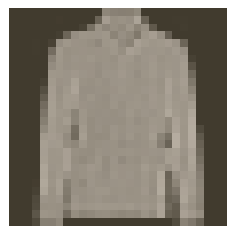

In [10]:
image,label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [11]:
Model = fc_loader.Network(784,10,[256,128,64],dropout_p=0.2)

In [12]:
print(Model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [13]:
criterion=nn.NLLLoss()
optimizer=torch.optim.Adam(Model.parameters())

In [15]:
train_loss,test_loss,accuracy=fc_loader.train(Model,trainloader,testloader,criterion,optimizer,epochs=10)

Epoch: 1/10..  Training Loss: 0.595..  Test Loss: 0.439..  Test Accuracy: 0.841
Epoch: 2/10..  Training Loss: 0.433..  Test Loss: 0.403..  Test Accuracy: 0.852
Epoch: 3/10..  Training Loss: 0.398..  Test Loss: 0.396..  Test Accuracy: 0.860
Epoch: 4/10..  Training Loss: 0.371..  Test Loss: 0.383..  Test Accuracy: 0.860
Epoch: 5/10..  Training Loss: 0.355..  Test Loss: 0.369..  Test Accuracy: 0.866
Epoch: 6/10..  Training Loss: 0.344..  Test Loss: 0.354..  Test Accuracy: 0.871
Epoch: 7/10..  Training Loss: 0.329..  Test Loss: 0.360..  Test Accuracy: 0.872
Epoch: 8/10..  Training Loss: 0.322..  Test Loss: 0.350..  Test Accuracy: 0.875
Epoch: 9/10..  Training Loss: 0.314..  Test Loss: 0.369..  Test Accuracy: 0.864
Epoch: 10/10..  Training Loss: 0.303..  Test Loss: 0.345..  Test Accuracy: 0.879


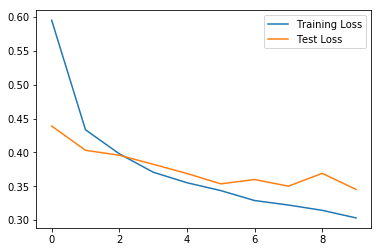

In [22]:
plt.plot(train_loss,label='Training Loss');
plt.plot(test_loss,label='Test Loss');
plt.legend();

In [24]:
checkpoint={"input_size":784,
           "output_size":10,
           "hidden_layers":[l.out_features for l in Model.hidden_layers],
           "state_dict":Model.state_dict()}
torch.save(checkpoint,"../models/Fashion_MNIST_784,256,128,64,10")

In [25]:
importlib.reload(fc_loader)

<module 'fc_loader' from '/Users/nithin_rao/MyFiles/MS/OnlineLearning/Pytorch_DeepLearning/Lesson4_Intro_to_Pytorch/fc_loader.py'>

In [27]:
del Model

In [28]:
Model=fc_loader.load_model("../models/Fashion_MNIST_784,256,128,64,10")

In [29]:
print(Model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [31]:
pred=Model.forward(image[0].view(1,-1))

In [32]:
_,label_pred=torch.topk(pred,1,dim=1)

In [38]:
print(label_pred)

tensor([[ 4]])


In [39]:
print(label[0])

tensor(4)


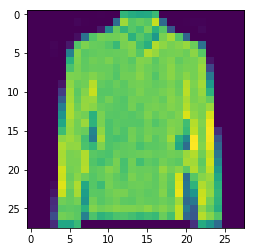

In [37]:
plt.imshow(image[0,:].view(28,28))